#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Importing the libraries</div>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Loading the dataset</div>

In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Getting the data into predictors and labels</div>

In [3]:
X, y = mnist.get("data"), mnist.get("target")

In [4]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


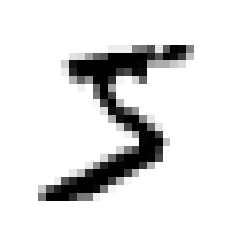

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
# Converting the values inside labels to int
y = y.astype(int)

In [7]:
y[0]

5

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Separating into training set and test set</div>

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Training a binary classifier</div>

In [9]:
# only to detect 5
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Training the model for detecting 5</div>

In [10]:
%%time
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state=42)
clf.fit(X_train, y_train_5)

CPU times: user 12.8 s, sys: 91.7 ms, total: 12.9 s
Wall time: 12.9 s


SGDClassifier(random_state=42)

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Predict the value 5</div>

In [11]:
clf.predict([some_digit])[0]

True

<span style="color:red">This means that our model predicted value correctly</span>

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Performance Measures</div>

## <div style="color:white; background-color:blue; padding:20px; text-align:left; border-radius:10px">Measuring Accuracy Using Cross Validation</div>

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

- <span style="color:red">Over 90% accuracy but if you observe closely you will get that only 10% of the y_train_5 is a 5.</span>
- <span style="color:red">So if the model predicts not 5 for everycase then there is 90% chance that the model is correct. Hence we get so much accuracy</span>
- **<span style="color:red">This is why we dont use cross_val_score much</span>**

## <div style="color:white; background-color:blue; padding:20px; text-align:left; border-radius:10px">Confusion Matrix</div>